# Netlfix Insights and Analysis

## Loading the dataset 

In [121]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head(10)
netflix_df.to_excel('nefflix_dataset.xlsx') # I did this so that I could view it in an excel file as I enjoy looking at my data while analyzing it

In [123]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [124]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Transformaing the dataset for analysis

In [125]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed')

In [126]:
netflix_shows=netflix_df[netflix_df['type']=='TV Show']
netflix_shows['show_id'] = netflix_shows['show_id'].str.replace('s','')
netflix_movies=netflix_df[netflix_df['type']=='Movie']
netflix_movies['show_id'] = netflix_movies['show_id'].str.replace('s','')

In [127]:
netflix_movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [128]:
netflix_shows.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [129]:
directors_movies = netflix_movies['director'].unique()
directors_shows = netflix_shows['director'].unique()
movies_categories = netflix_movies['listed_in'].unique()
shows_categories = netflix_shows['listed_in'].unique()


## Inital Analysis

lets first inspect how many tv shows and movies are there in out dataset

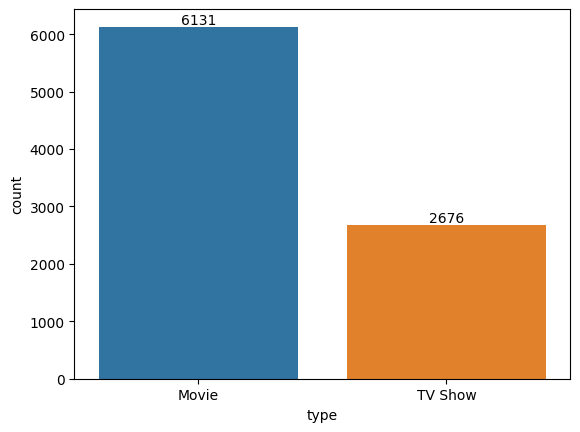

In [130]:
category_counts = netflix_df['type'].value_counts()
type_countplot = sns.countplot(data=netflix_df, x='type')
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

lets inspect how many movies are added to netflix every year

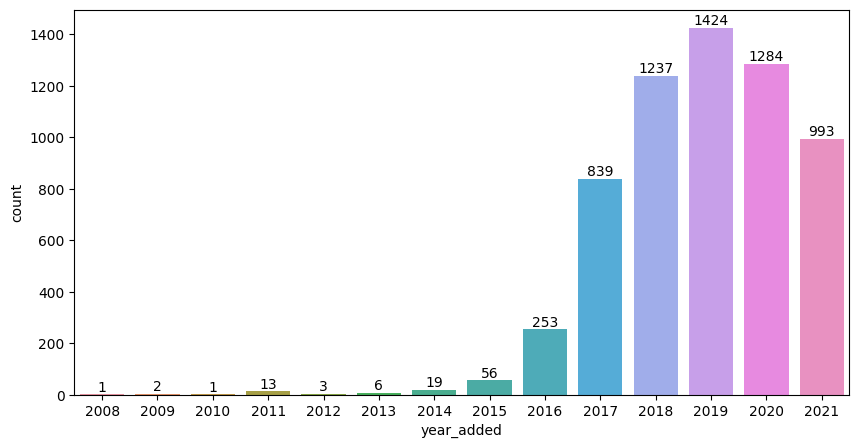

In [131]:
netflix_movies['year_added'] = netflix_movies['date_added'].dt.year
year_counts = netflix_movies['year_added'].value_counts()
year_counts = year_counts.sort_index()
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_movies, x='year_added')
for i, count in enumerate(year_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()



lets see how many series are added into the netflix platform every year

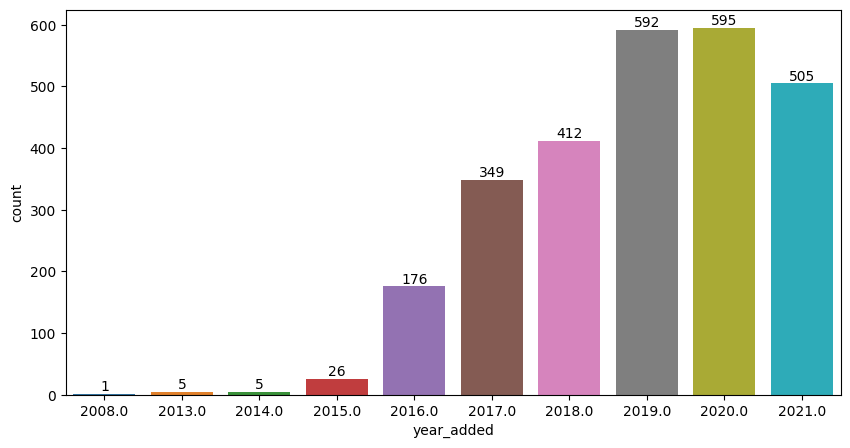

In [132]:
netflix_shows['year_added'] = netflix_shows['date_added'].dt.year
year_counts = netflix_shows['year_added'].value_counts()
year_counts = year_counts.sort_index()
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_shows, x='year_added')
for i, count in enumerate(year_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

It is seen that from the year of 2016 the amount of movies and series added on to the platform increasing. But it cannot be ignored that from the year 2020 there is a drop in both series added and moveis added. This could be a result of covid pandemic or a certain finanical issue.

##### Lets look at the vastness of release years of these movies and series to understand which period of movies are prominent in the platform

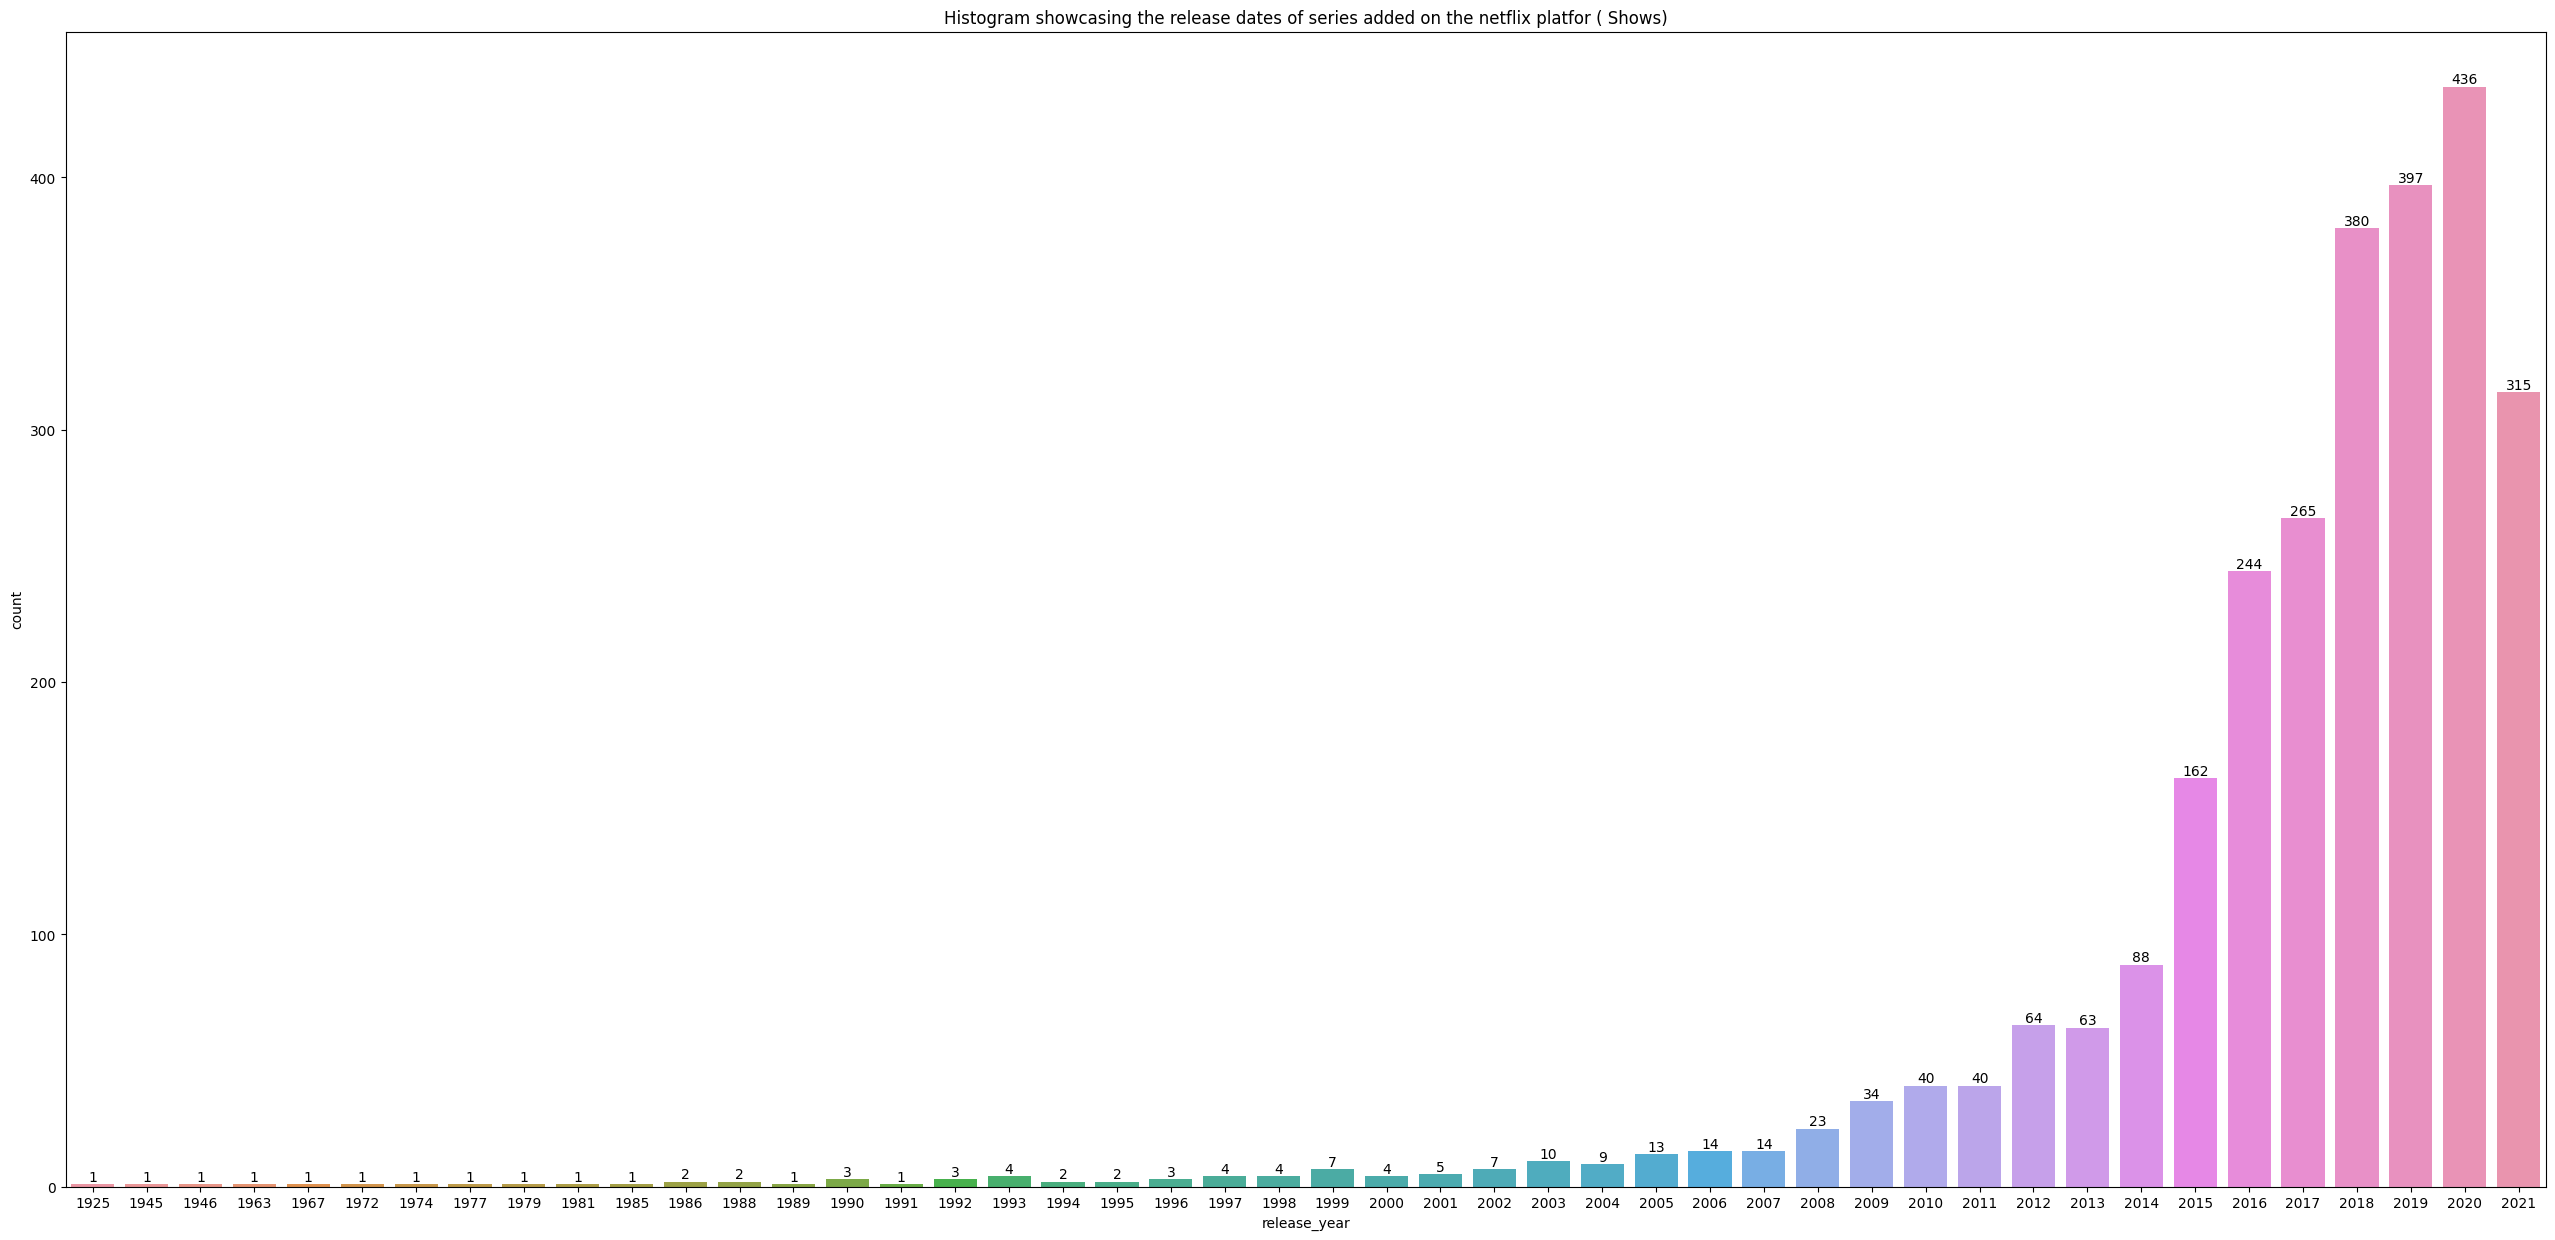

In [133]:
year_counts = netflix_shows['release_year'].value_counts()
year_counts = year_counts.sort_index()
plt.figure(figsize=(32,15))
plt.title("Histogram showcasing the release dates of series added on the netflix platfor ( Shows)")
sns.countplot(data=netflix_shows, x='release_year')
for i, count in enumerate(year_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

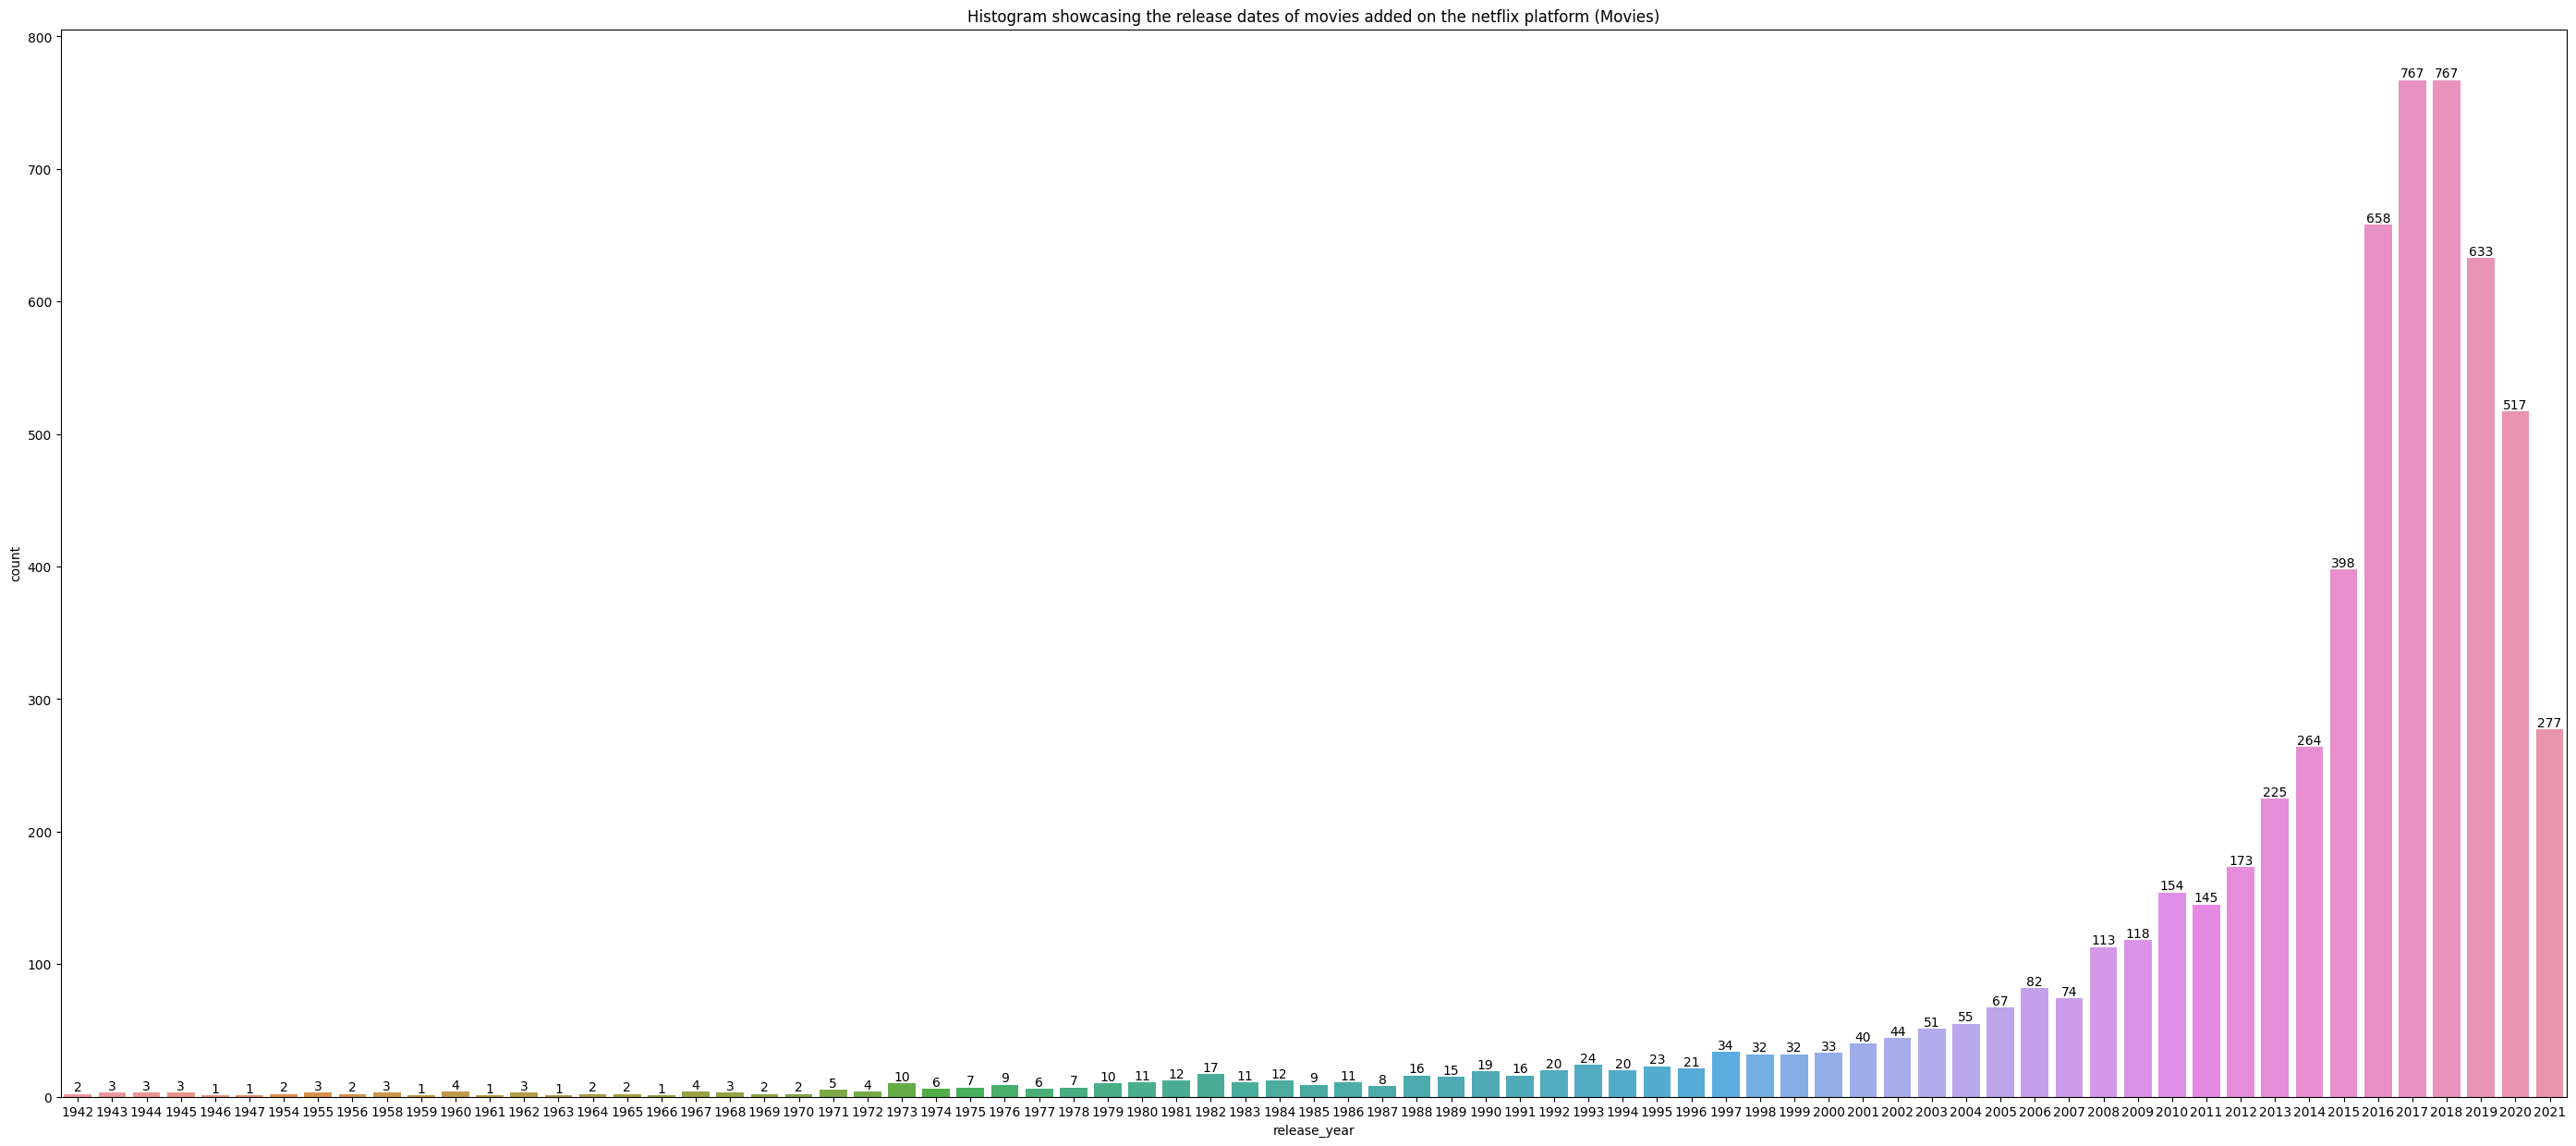

In [134]:
year_counts = netflix_movies['release_year'].value_counts()
year_counts = year_counts.sort_index()
plt.figure(figsize=(35,15))
plt.title("Histogram showcasing the release dates of movies added on the netflix platform (Movies)")
sns.countplot(data=netflix_movies, x='release_year')
for i, count in enumerate(year_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

when we look at the movies and series added onto the platform, the period from 2011 to 2019 there was a explonention increase in the addition of movies and series in that period. With respect to movies, the trend continued to the year 2020 while in series, there is a decline in the amount of series added from the period of 2019-2021.

#### Lets see amoungst all these shows and movies what is the division on the ratings 

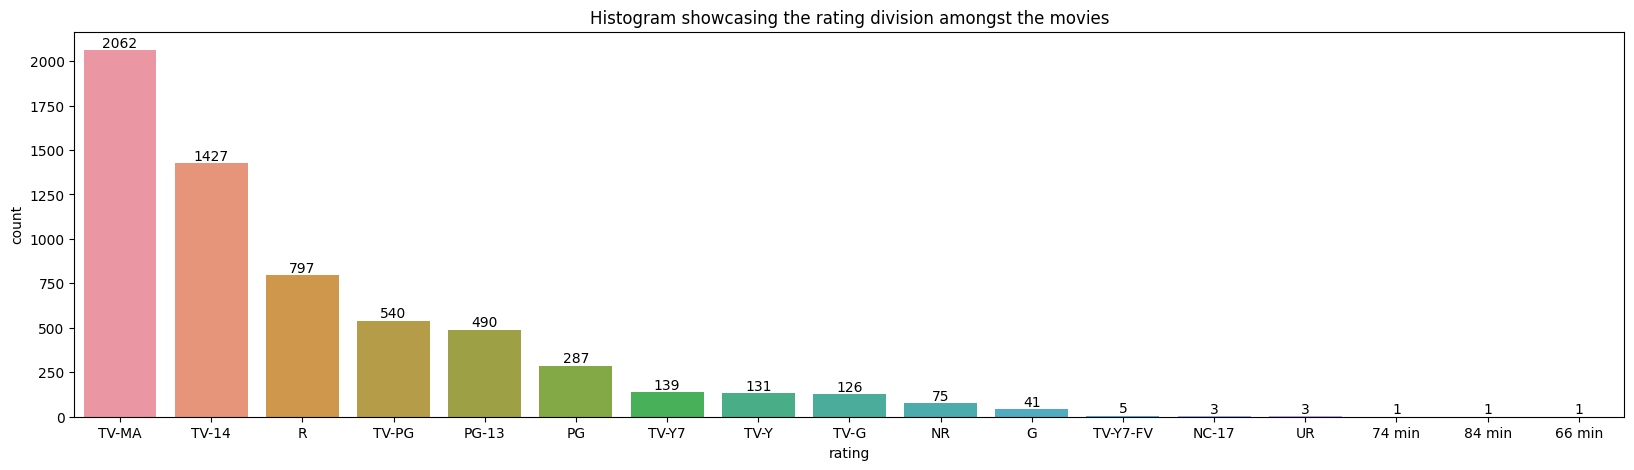

In [135]:
rating_counts = netflix_movies['rating'].value_counts()
plt.figure(figsize=(20,5))
plt.title("Histogram showcasing the rating division amongst the movies")
order = rating_counts.index
sns.countplot(data=netflix_movies, x='rating', order=order)
for i, count in enumerate(rating_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

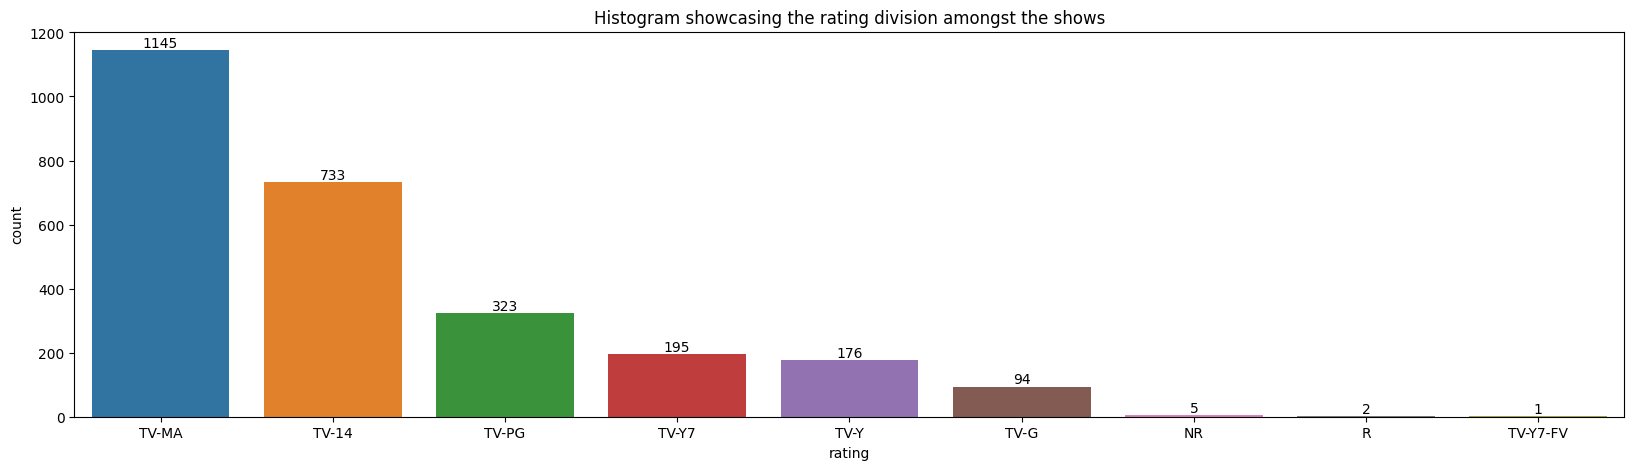

In [136]:
rating_counts = netflix_shows['rating'].value_counts()
plt.figure(figsize=(20,5))
plt.title("Histogram showcasing the rating division amongst the shows")
order = rating_counts.index
sns.countplot(data=netflix_shows, x='rating', order=order)
for i, count in enumerate(rating_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

From the above 2 graph we can see that TV-MA is the most popular group rating amoungs both tv shows and movies which counts for almost 3207 movies and shows combined. Similarily the top 3 ratings are TV-MA, TV-14 and TV-PG for shows and R for movies. 

#### lets now see the duration analysis of our movies and shows

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


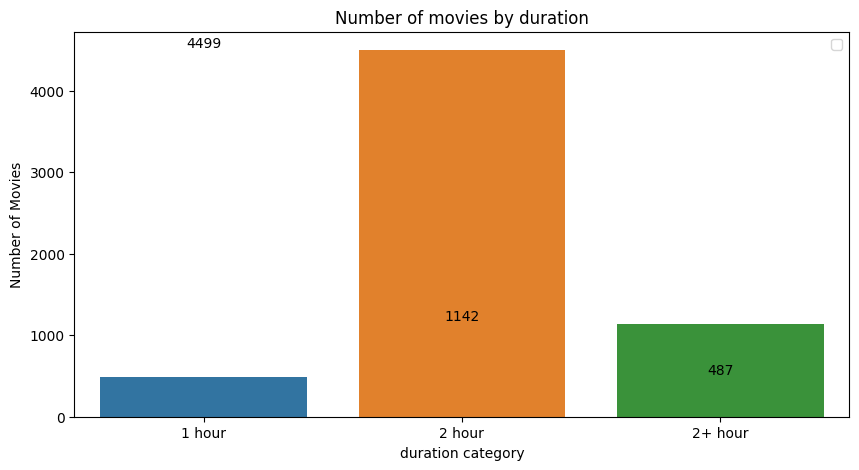

In [137]:
#creating bins for the duration of movies
netflix_movies['duration'] = netflix_movies['duration'].str.extract('(\d+)', expand=False).fillna(0).astype(int)
netflix_movies['duration_cat'] = pd.cut(netflix_movies['duration'], bins=[0,60,120, float('inf')], labels=['1 hour', '2 hour', '2+ hour'])

# ploting
cat_count = netflix_movies['duration_cat'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=netflix_movies, x='duration_cat', order=['1 hour', '2 hour', '2+ hour'])

for i, count in enumerate(cat_count):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.xlabel("duration category")
plt.ylabel("Number of Movies")
plt.title('Number of movies by duration')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


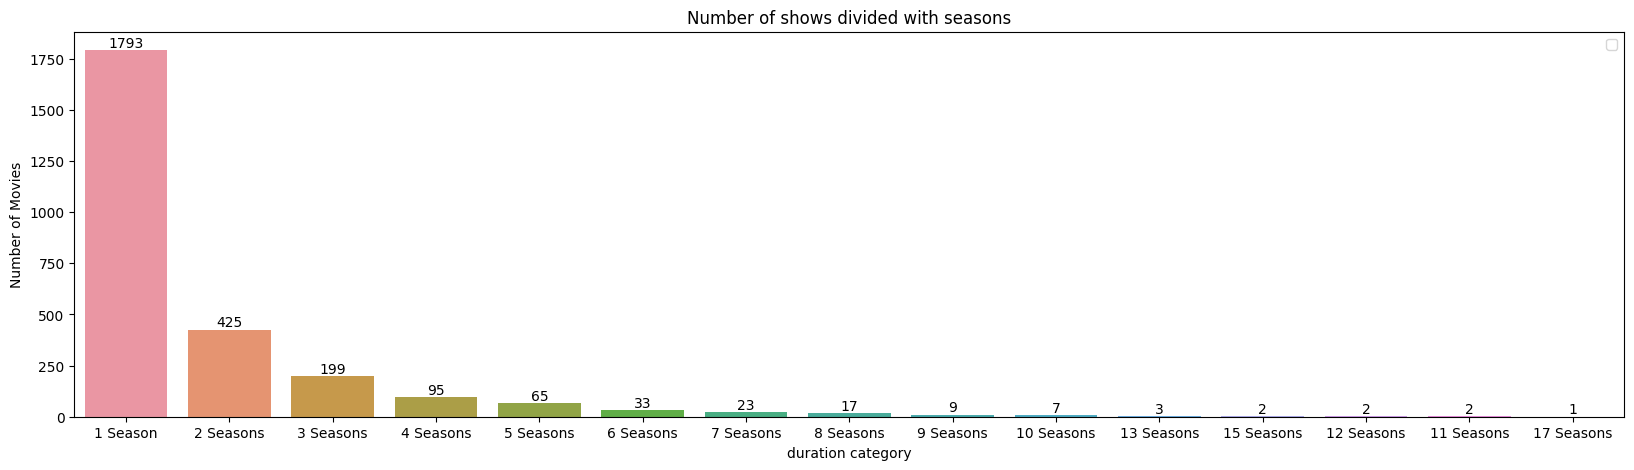

In [138]:
# ploting
cat_count = netflix_shows['duration'].value_counts()
order = cat_count.index
plt.figure(figsize=(20,5))
sns.countplot(data=netflix_shows, x='duration', order=order)

for i, count in enumerate(cat_count):
    plt.text(i, count, str(count), ha='center', va='bottom')


plt.xlabel("duration category")
plt.ylabel("Number of Movies")
plt.title('Number of shows divided with seasons')

plt.legend()
plt.show()

#### Lets examin the "Listed_in" column which is the column that represents where these movies/shows are showcased in the platform or what genre they are in

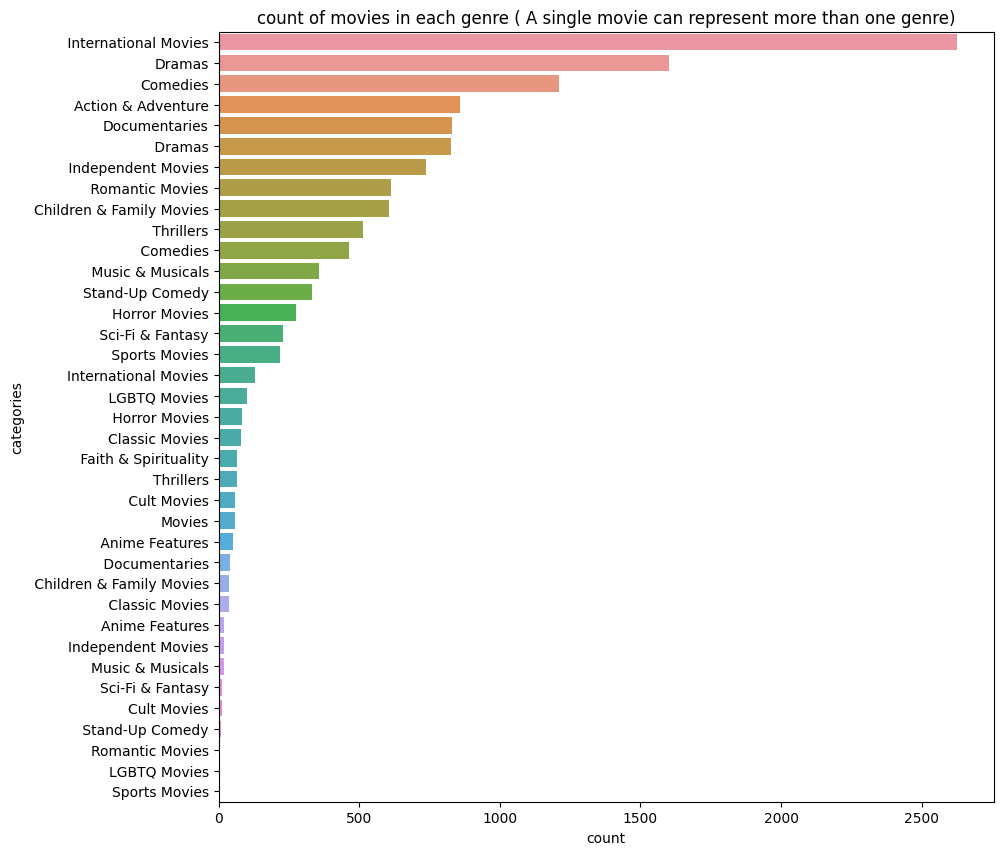

In [139]:
genre_count = pd.DataFrame(netflix_movies['listed_in'].str.split(',').explode().value_counts())
genre_count.reset_index(inplace=True)
genre_count.columns = ['category', 'count']

plt.figure(figsize=(10,10))
sns.barplot(data=genre_count, x='count', y='category')

plt.xlabel("count")
plt.ylabel("categories")
plt.title("count of movies in each genre ( A single movie can represent more than one genre)")
plt.show()

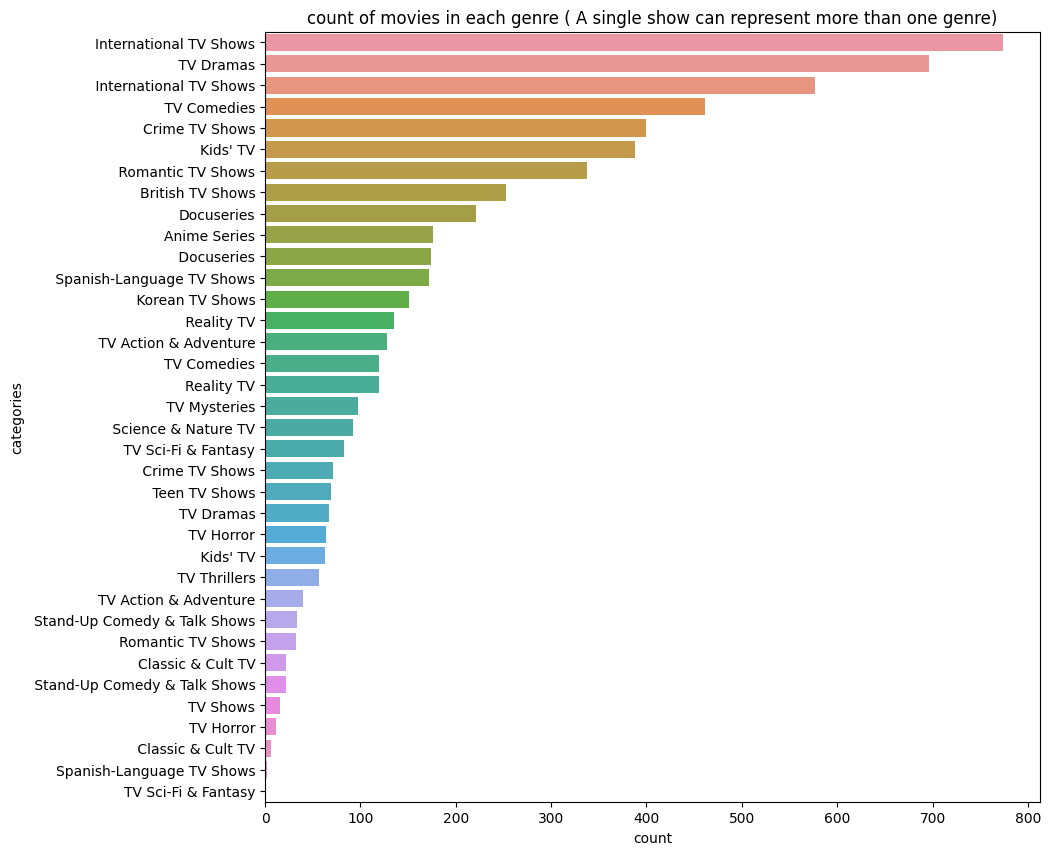

In [140]:
genre_count = pd.DataFrame(netflix_shows['listed_in'].str.split(',').explode().value_counts())
genre_count.reset_index(inplace=True)
genre_count.columns = ['category', 'count']

plt.figure(figsize=(10,10))
sns.barplot(data=genre_count, x='count', y='category')

plt.xlabel("count")
plt.ylabel("categories")
plt.title("count of movies in each genre ( A single show can represent more than one genre)")
plt.show()

##### Let us now examine the country wise production/addition of movies and series in Netflix platform

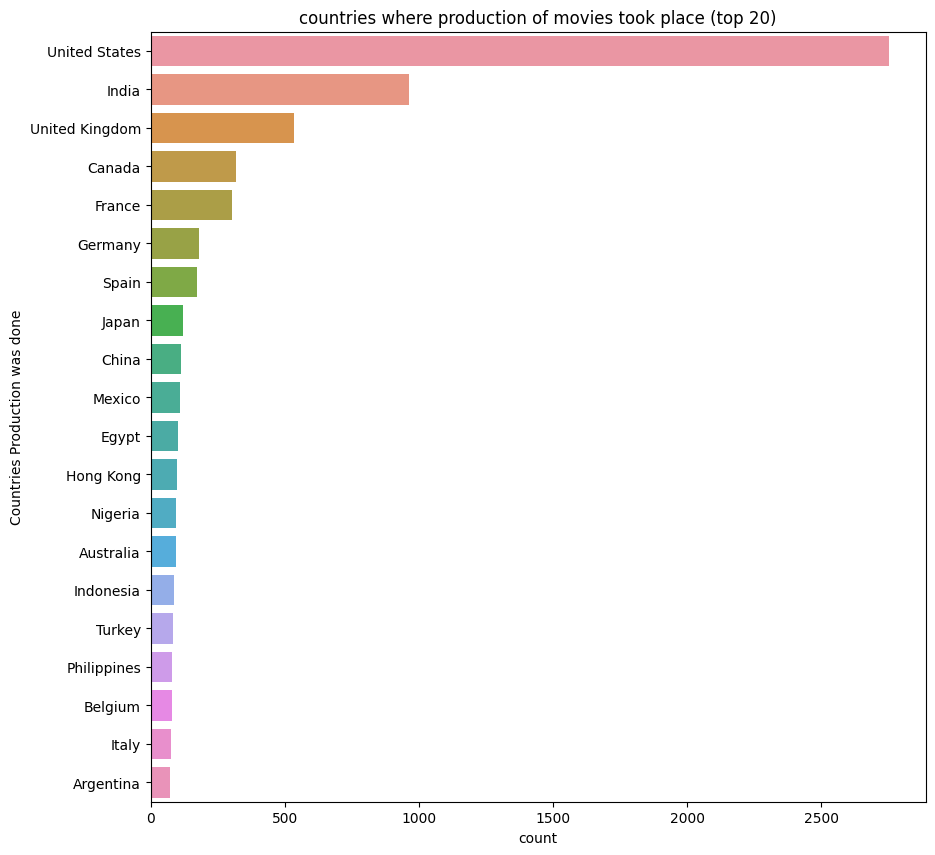

In [141]:
country_count_movies = pd.DataFrame(netflix_movies['country'].str.split(',').explode().str.strip().value_counts())
country_count_movies .reset_index(inplace=True)
country_count_movies .columns = ['category', 'count']
country_count_movies = country_count_movies [:20]

plt.figure(figsize=(10,10))
sns.barplot(data=country_count_movies, x='count', y='category')

plt.xlabel("count")
plt.ylabel("Countries Production was done")
plt.title("countries where production of movies took place (top 20)")
plt.show()

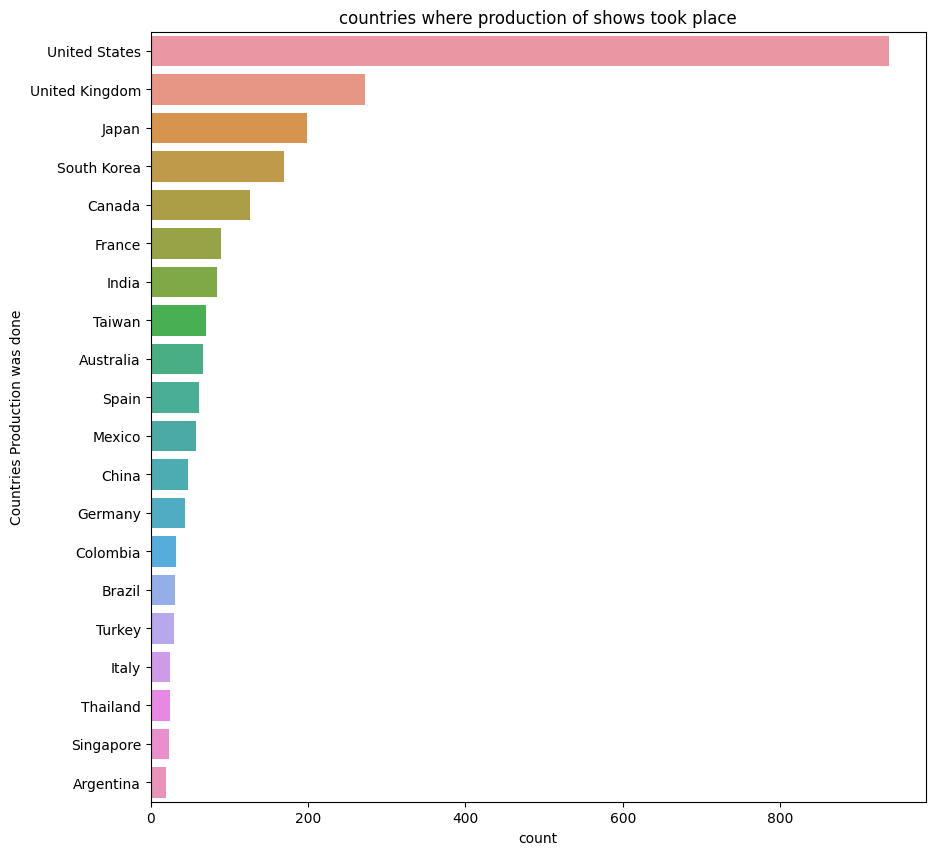

In [142]:
country_count_shows = pd.DataFrame(netflix_shows['country'].str.split(',').explode().str.strip().value_counts())
country_count_shows.reset_index(inplace=True)
country_count_shows.columns = ['category', 'count']
country_count_shows = country_count_shows[:20]

plt.figure(figsize=(10,10))
sns.barplot(data=country_count_shows, x='count', y='category')

plt.xlabel("count")
plt.ylabel("Countries Production was done")
plt.title("countries where production of shows took place")
plt.show()

#### Lets examine the directors who makes movies and tv shows

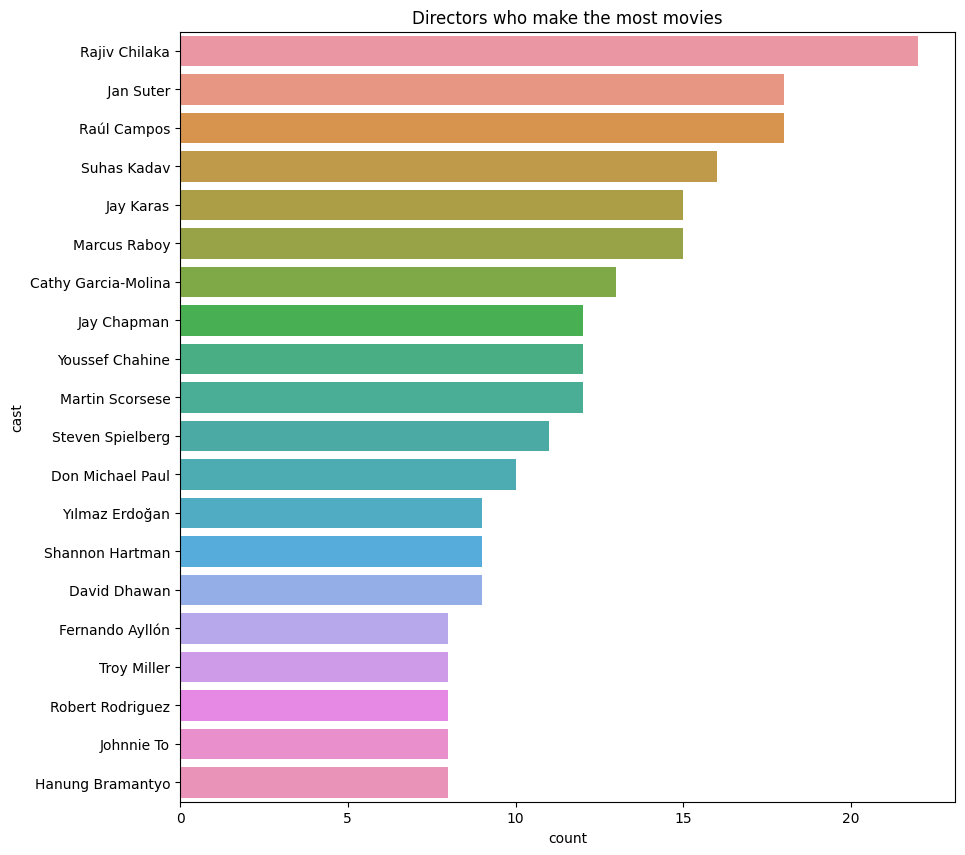

In [143]:
director_count = pd.DataFrame(netflix_movies['director'].str.split(',').explode().value_counts())
director_count.reset_index(inplace=True)
director_count.columns = ['cast', 'count']
director_count = director_count[:20]

plt.figure(figsize=(10,10))
sns.barplot(data=director_count, x='count', y='cast')

plt.xlabel("count")
plt.ylabel("cast")
plt.title("Directors who make the most movies")
plt.show()

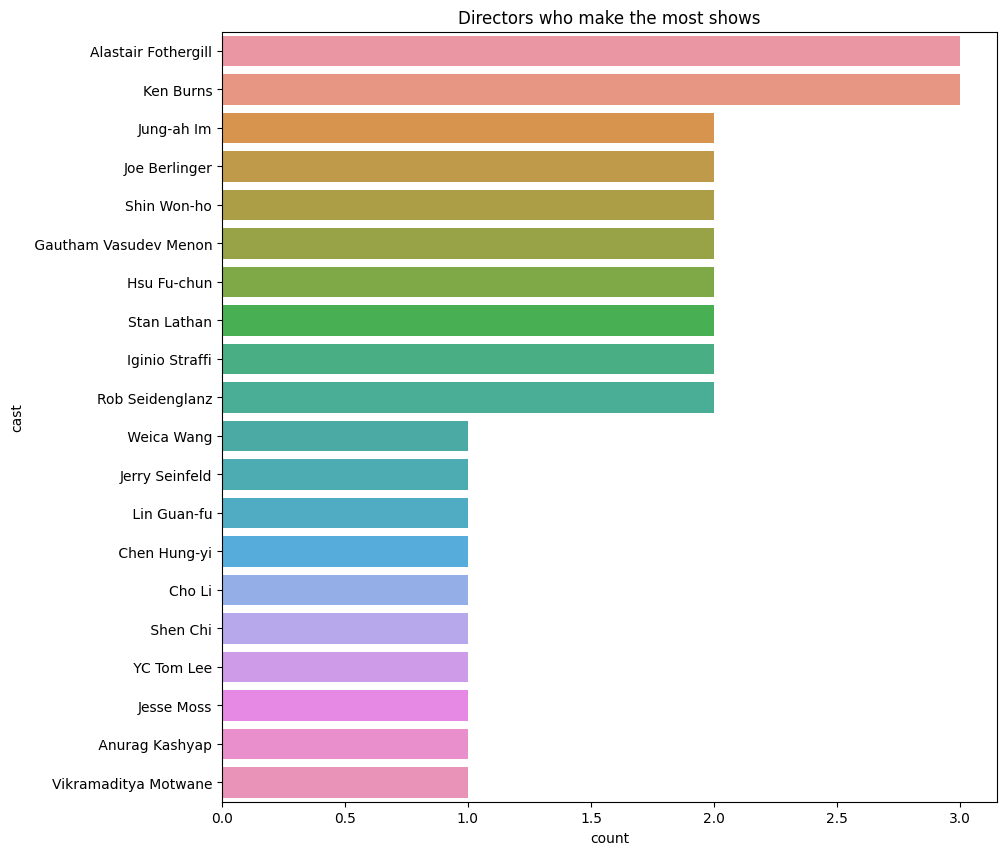

In [144]:
director_count = pd.DataFrame(netflix_shows['director'].str.split(',').explode().value_counts())
director_count.reset_index(inplace=True)
director_count.columns = ['cast', 'count']
director_count = director_count[:20]

plt.figure(figsize=(10,10))
sns.barplot(data=director_count, x='count', y='cast')

plt.xlabel("count")
plt.ylabel("cast")
plt.title("Directors who make the most shows")
plt.show()

#### lets examine the top casts the produce them most amount of movies that appear in netflix

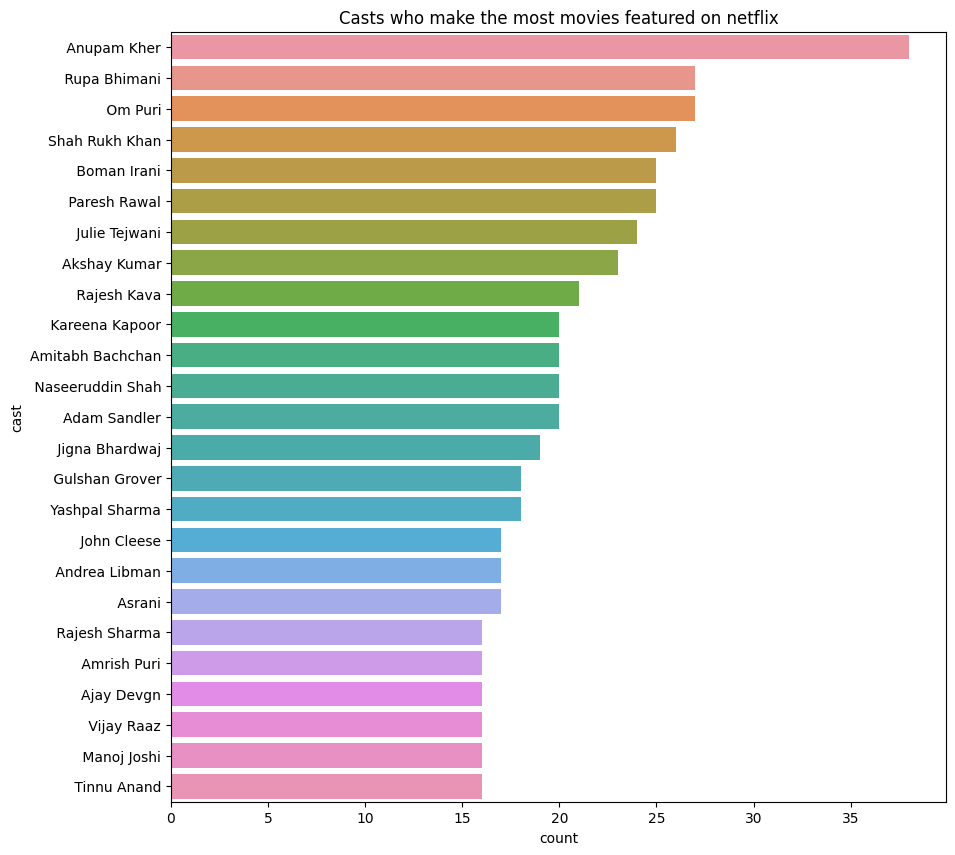

In [145]:
cast_count = pd.DataFrame(netflix_movies['cast'].str.split(',').explode().value_counts())
cast_count.reset_index(inplace=True)
cast_count.columns = ['cast', 'count']
cast_count = cast_count[:25]
#cast_count['cast'] = cast_count['cast'].str.replace(r'\$', 's')
#cast_counts = cast_count[~cast_count['cast'].str.contains('[^a-zA-Z\s]', regex=True)]
cast_count['cast'] = cast_count['cast'].str.replace('Joey Bada$$', 'Joey Badass')

plt.figure(figsize=(10,10))
sns.barplot(data=cast_count, x='count', y='cast')

plt.xlabel("count")
plt.ylabel("cast")
plt.title("Casts who make the most movies featured on netflix")
plt.show()

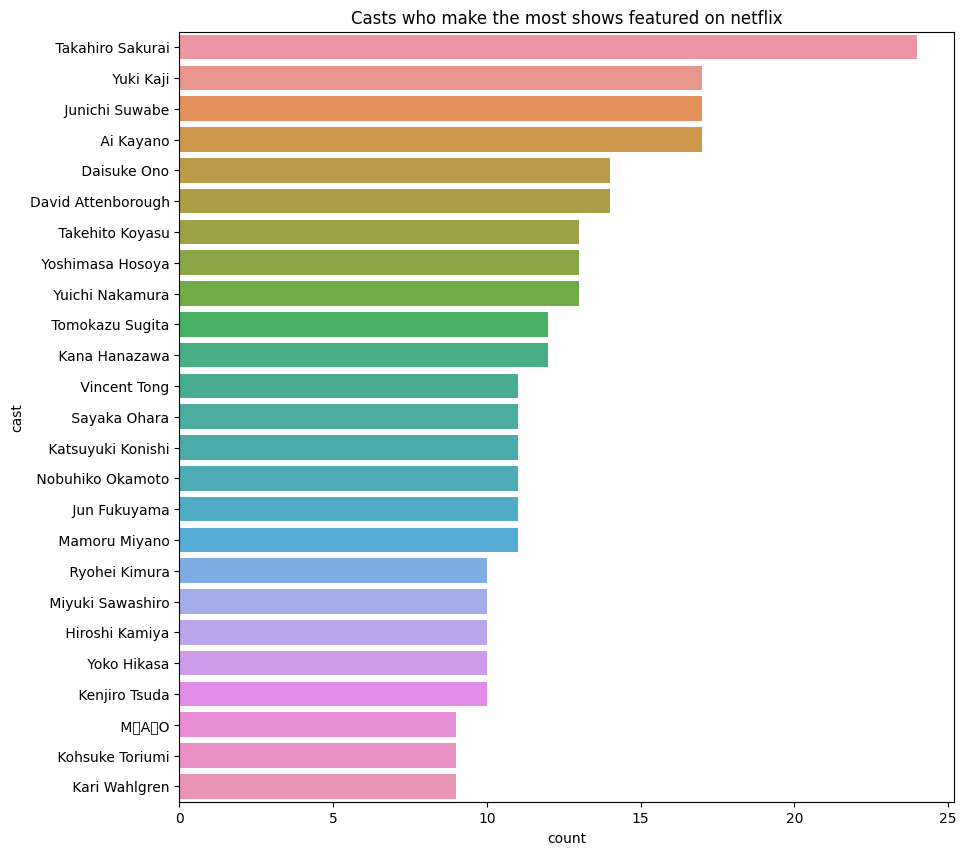

In [146]:
cast_count = pd.DataFrame(netflix_shows['cast'].str.split(',').explode().value_counts())
cast_count.reset_index(inplace=True)
cast_count.columns = ['cast', 'count']
cast_count = cast_count[:25]
#cast_count['cast'] = cast_count['cast'].str.replace(r'\$', 's')
#cast_counts = cast_count[~cast_count['cast'].str.contains('[^a-zA-Z\s]', regex=True)]
cast_count['cast'] = cast_count['cast'].str.replace('Joey Bada$$', 'Joey Badass')

plt.figure(figsize=(10,10))
sns.barplot(data=cast_count, x='count', y='cast')

plt.xlabel("count")
plt.ylabel("cast")
plt.title("Casts who make the most shows featured on netflix")
plt.show()

### Indept Analysis of the Dataset

here we will try and make assumption of the data and see which of the assuptions are correct

#### Which is the best month to release the movie or series on netflix? ( we need to make sure the movie/series has less compitetion and hence the month with the least amount of releases)

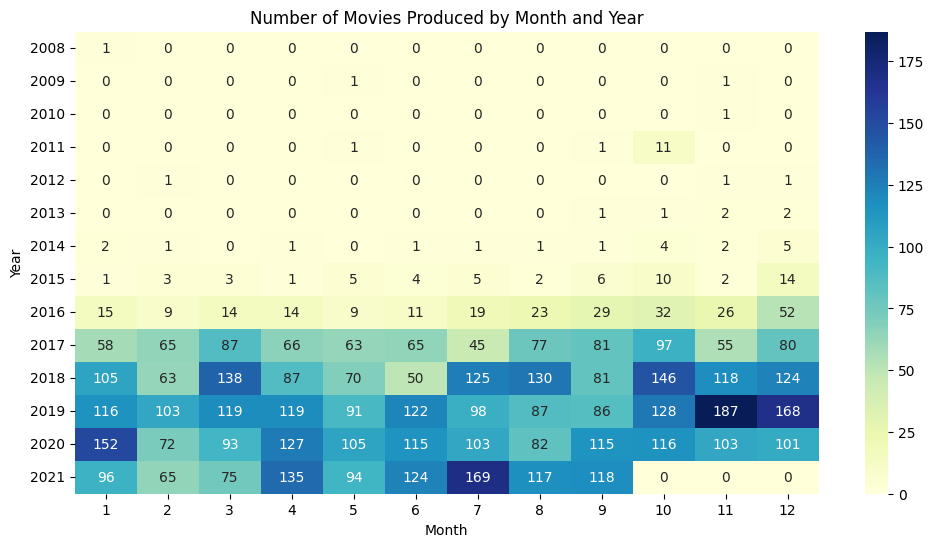

In [147]:
netflix_movies['added month'] = netflix_movies['date_added'].dt.month
netflix_movies['added year'] = netflix_movies['date_added'].dt.year
# Create a pivot table to count the number of movies by year and month
movies_count = netflix_movies.pivot_table(index='added year', columns='added month', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(movies_count, annot=True, cmap='YlGnBu', fmt='d')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Number of Movies Produced by Month and Year')

# Show the plot
plt.show()

when we look at the above table it can be seen that the best time to release a movie on netflix such that there isnt much competition would be the months of Feburary, May, August and September.

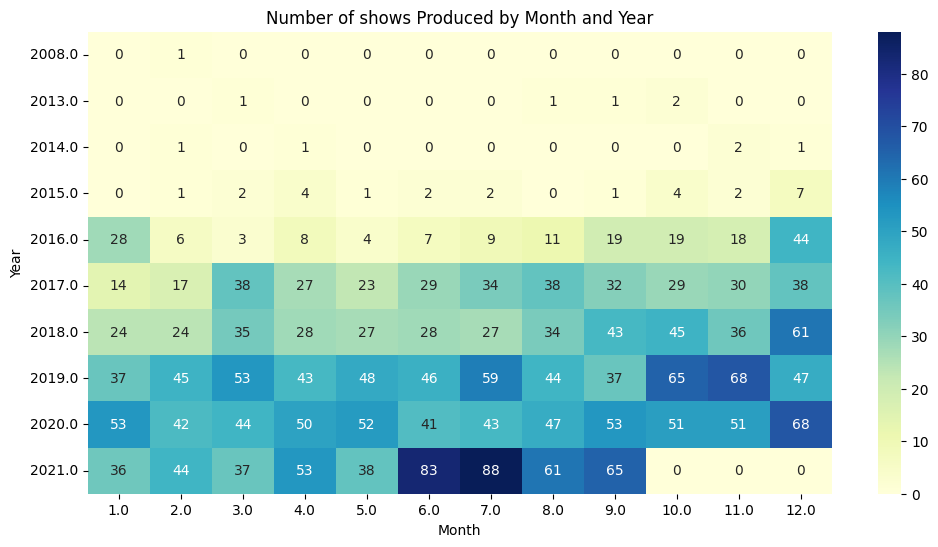

In [148]:
netflix_shows['added month'] = netflix_shows['date_added'].dt.month
netflix_shows['added year'] = netflix_shows['date_added'].dt.year
# Create a pivot table to count the number of movies by year and month
shows_count = netflix_shows.pivot_table(index='added year', columns='added month', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(shows_count, annot=True, cmap='YlGnBu', fmt='d')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Number of shows Produced by Month and Year')

# Show the plot
plt.show()

When looking at the best time to release a tv series on netflix, it is seen that it has been pretty evenly spread out and hence would not make much of a different. If we isolate only 2021, then definitly the first half of the eyar would be the best bet in terms of performance. 

#### Country Wise Analysis 

Lets now dig a little deeper into the top 5 countrys and find out the following....
1. Which are the top genres avaliable to each of th countries
2. Making a word cloud of the top things that are seen common storyline amongst each country

In [149]:
top_five_countries_movies = country_count_movies['category'][:5].tolist()
print("top 5 countries that produce movies",top_five_countries_movies)
top_five_countries_shows = country_count_shows['category'][:5].tolist()
print("top countries that produce tv shows",top_five_countries_shows)

top 5 countries that produce movies ['United States', 'India', 'United Kingdom', 'Canada', 'France']
top countries that produce tv shows ['United States', 'United Kingdom', 'Japan', 'South Korea', 'Canada']


### Contribution of top 5 countries in each genre (Movies)

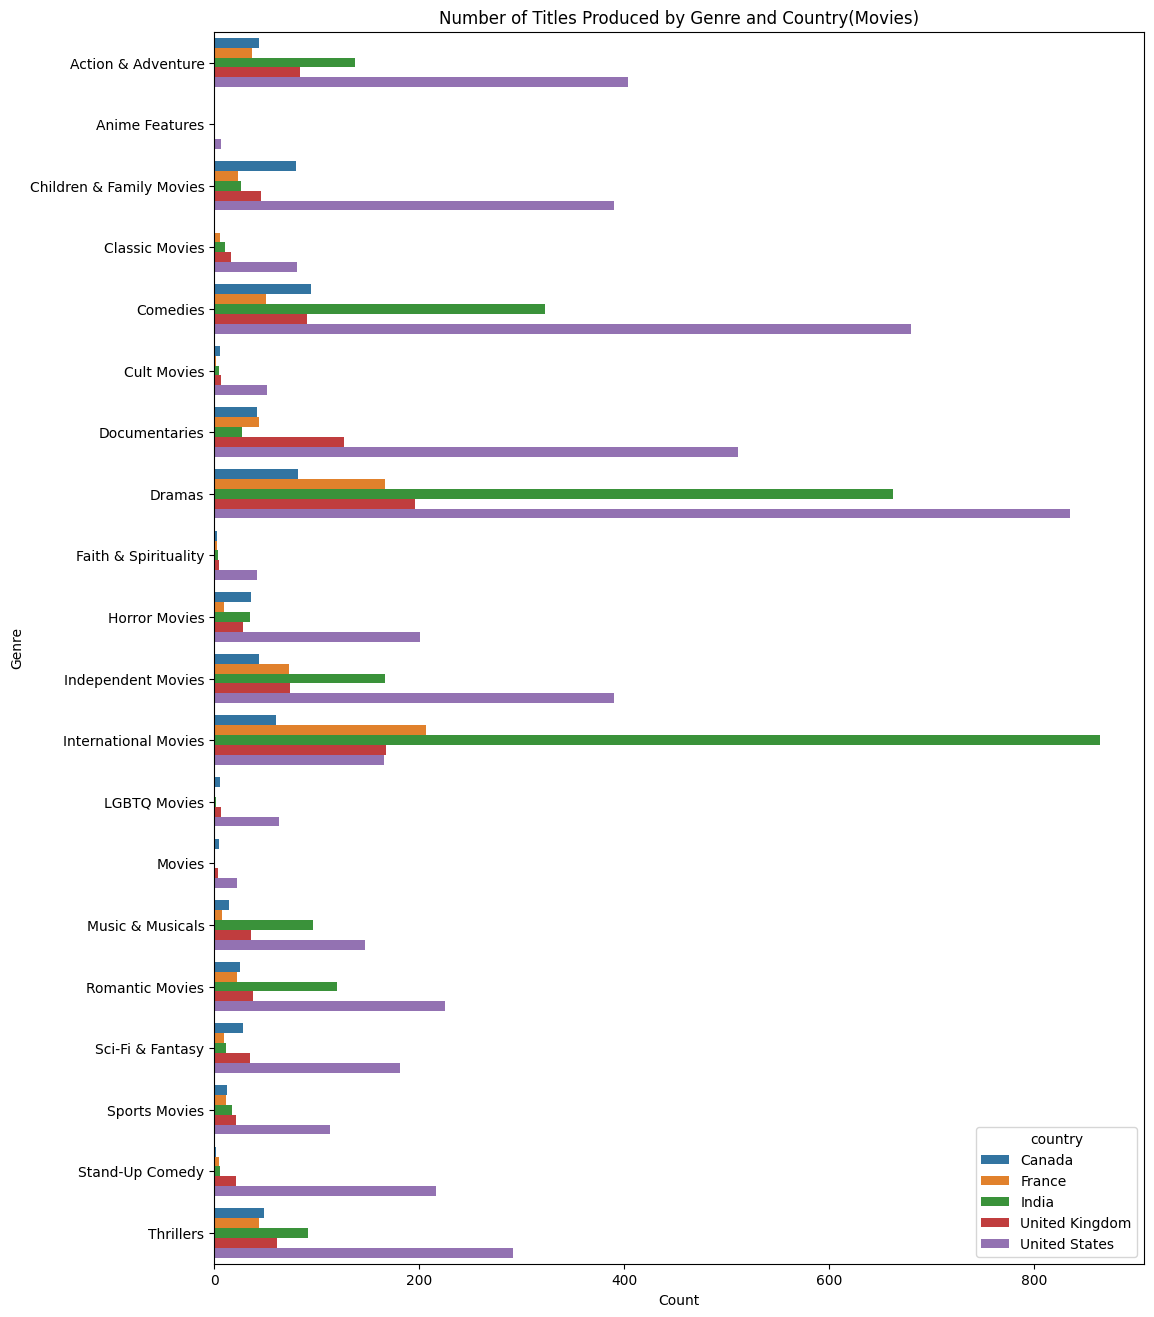

In [150]:
# creating a new dataframe with only the needed columns
df_filtered = netflix_movies[['listed_in', 'country', 'title']]
df_filtered['listed_in'] = df_filtered['listed_in'].str.split(', ')
df_filtered = df_filtered.explode('listed_in')
df_filtered['country'] = df_filtered['country'].str.split(', ')
df_filtered = df_filtered.explode('country')
df_filtered = df_filtered[df_filtered['country'].isin(top_five_countries_movies)]
genre_country_counts = df_filtered.groupby(['listed_in', 'country']).size().reset_index(name='count')


# Create a bar chart
plt.figure(figsize=(12, 16))
sns.barplot(data=genre_country_counts, x='count', y='listed_in', hue='country')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Number of Titles Produced by Genre and Country(Movies)')

# Show the plot
plt.show()

### Contribution of top 5 countries in each genre (shows)

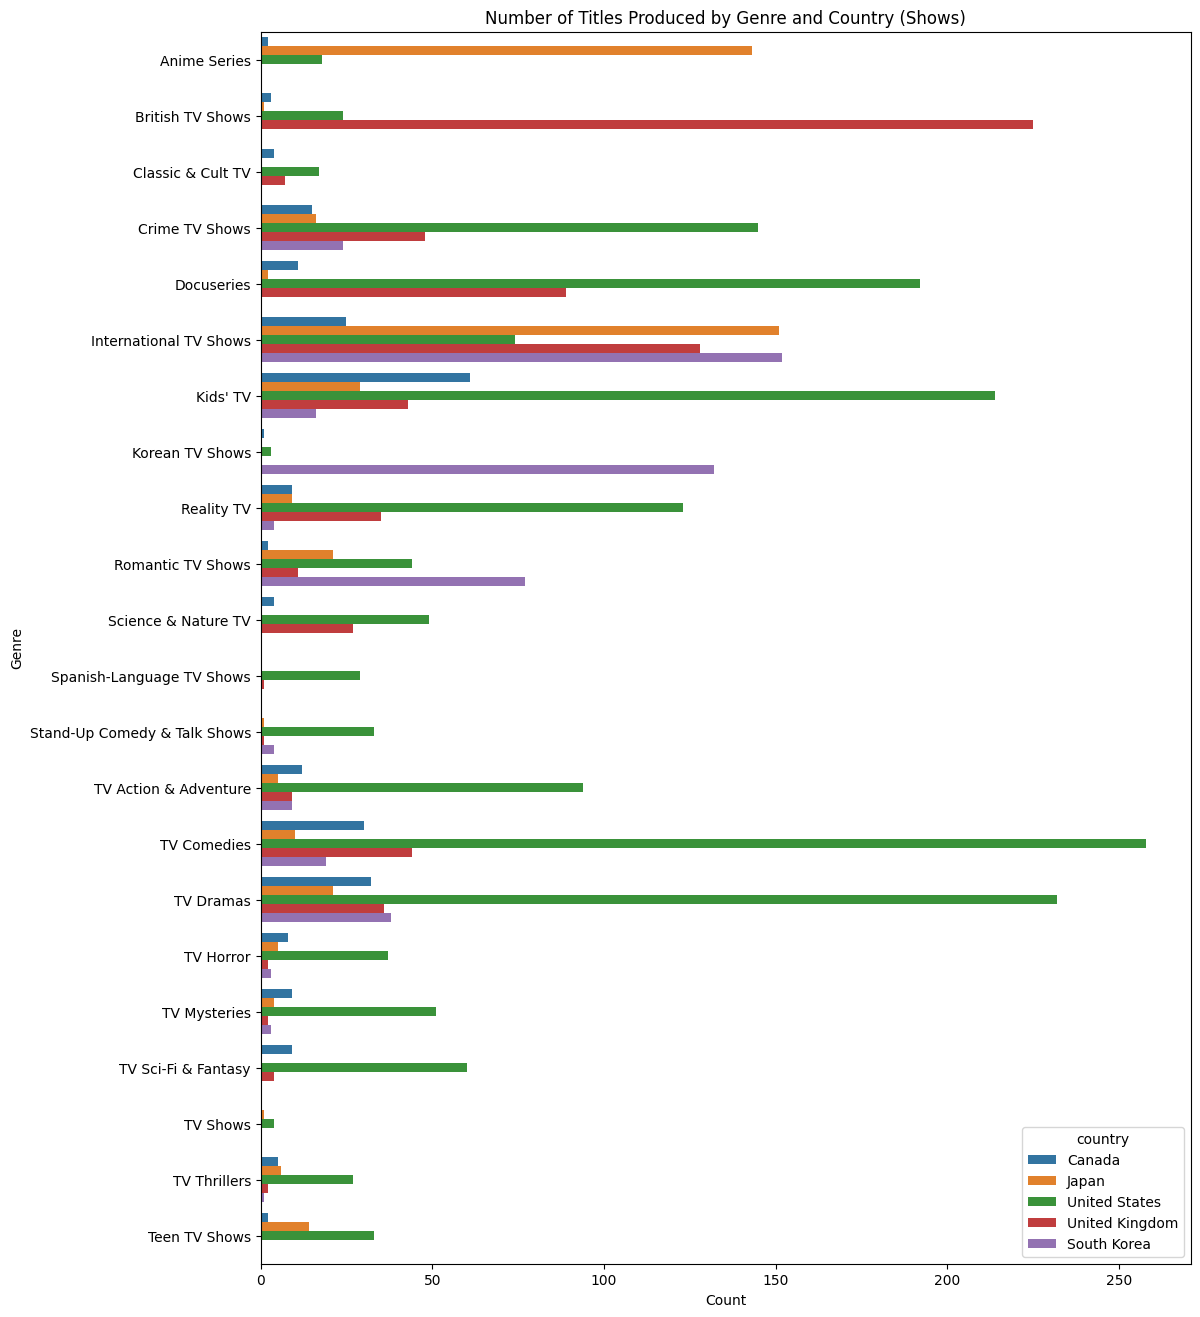

In [151]:
# creating a new dataframe with only the needed columns
df_filtered = netflix_shows[['listed_in', 'country', 'title']]
df_filtered['listed_in'] = df_filtered['listed_in'].str.split(', ')
df_filtered = df_filtered.explode('listed_in')
df_filtered['country'] = df_filtered['country'].str.split(', ')
df_filtered = df_filtered.explode('country')
df_filtered = df_filtered[df_filtered['country'].isin(top_five_countries_shows)]
genre_country_counts = df_filtered.groupby(['listed_in', 'country']).size().reset_index(name='count')


# Create a bar chart
plt.figure(figsize=(12, 16))
sns.barplot(data=genre_country_counts, x='count', y='listed_in', hue='country')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Number of Titles Produced by Genre and Country (Shows)')

# Show the plot
plt.show()

### Word cloud of the the top 25 words seen in the description amongst the top 5 countries

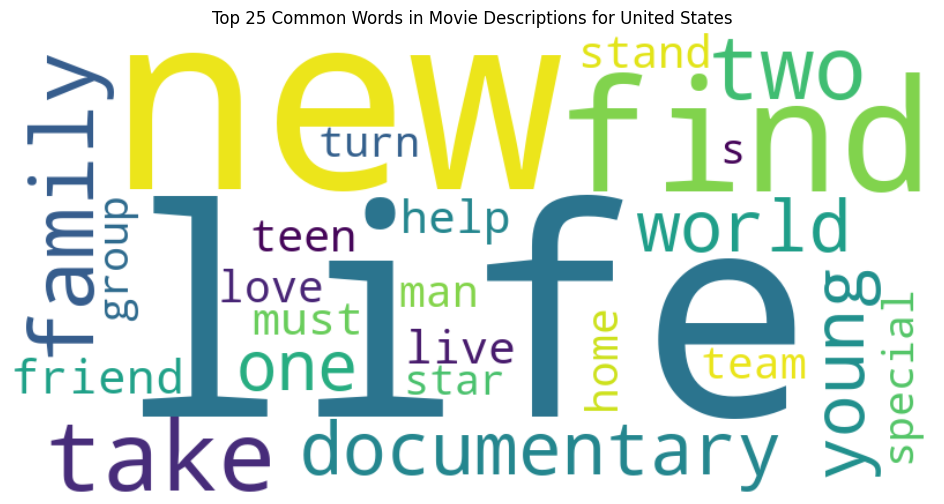

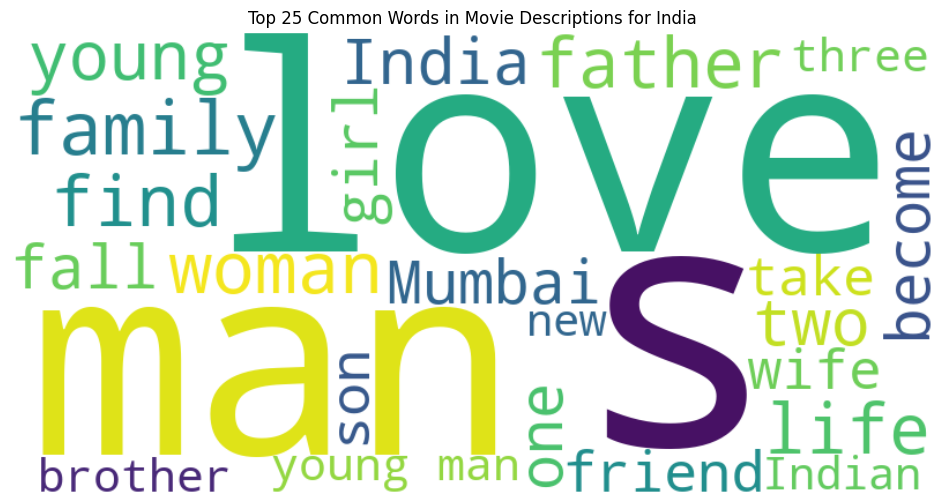

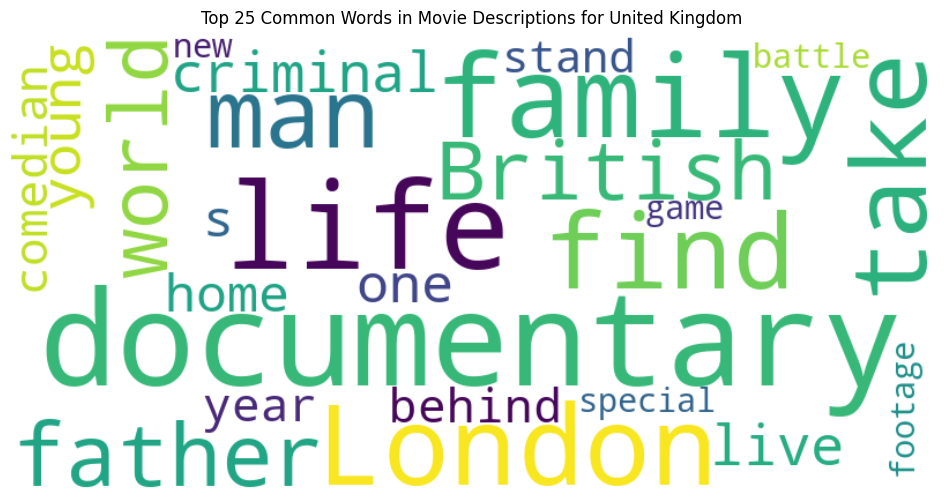

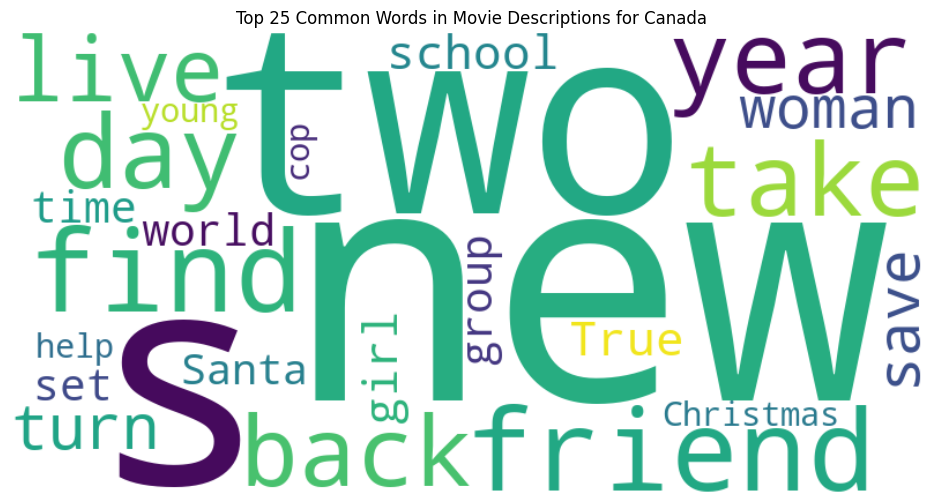

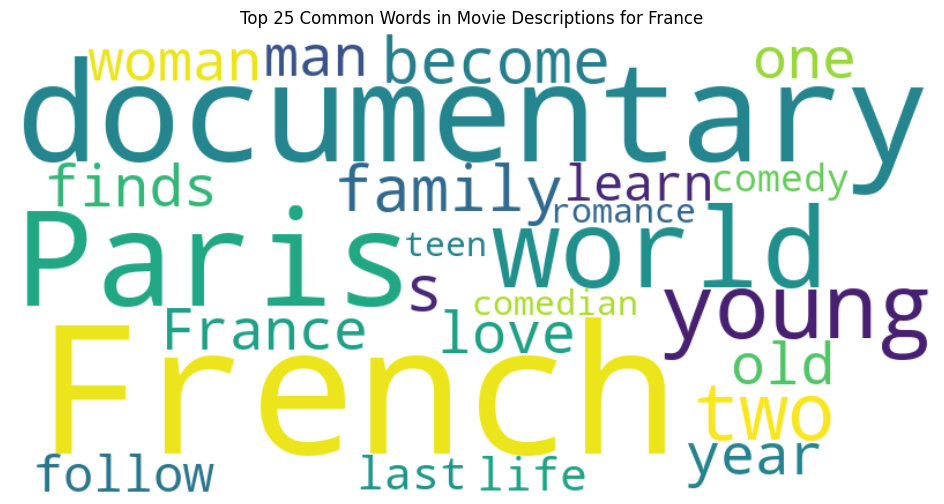

In [152]:
df_filtered = netflix_movies[netflix_movies['country'].isin(top_five_countries_movies)]
for country in top_five_countries_movies:
    country_descriptions = df_filtered[df_filtered['country'] == country]['description']
    all_descriptions = ' '.join(country_descriptions)
    # Remove stop words from the descriptions
    stopwords = set(STOPWORDS)
    stopwords.update(["movie", "film", "story", "show"])  # Add custom stop words if needed
    # Create a WordCloud object with cleaned descriptions
    wordcloud = WordCloud(width=800, height=400, max_words=25, background_color='white', stopwords=stopwords).generate(all_descriptions)
    
    # Display the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top 25 Common Words in Movie Descriptions for {country}")
    plt.show()

    

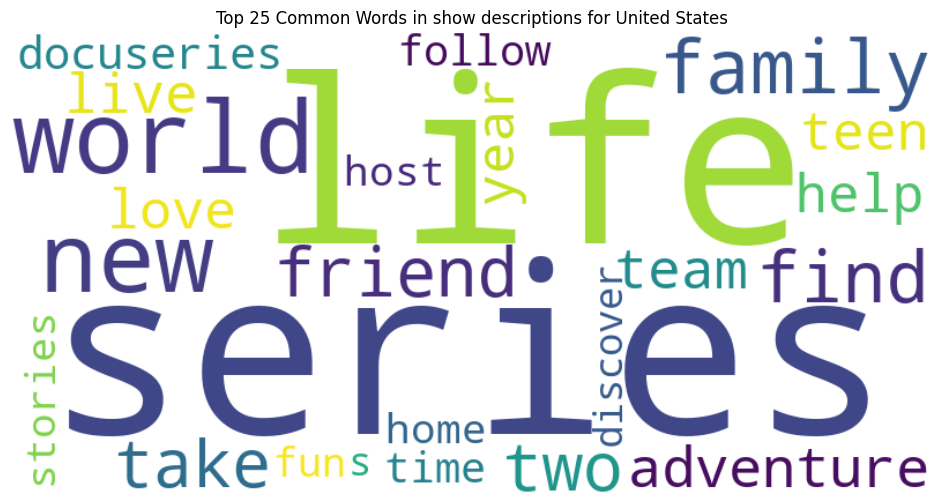

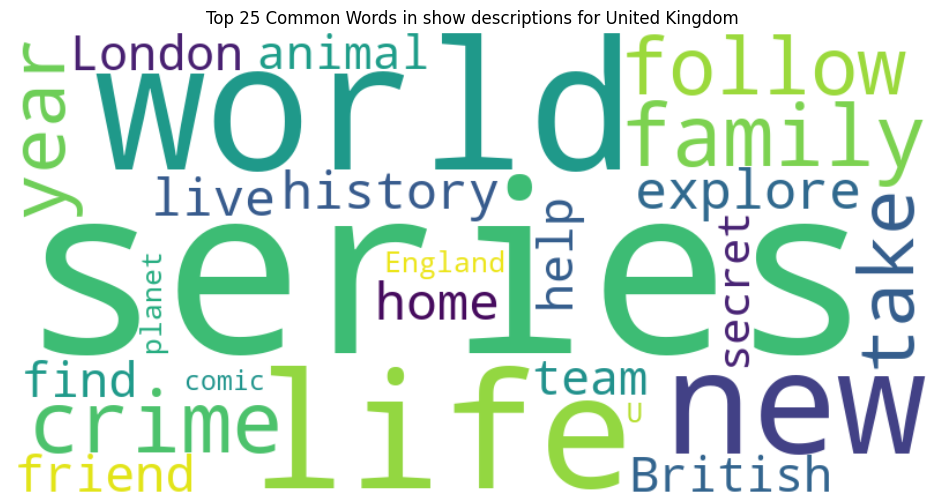

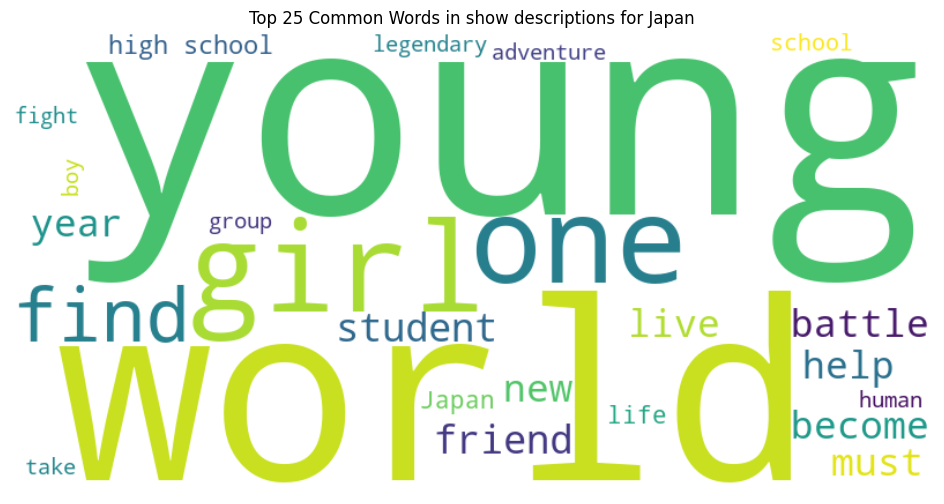

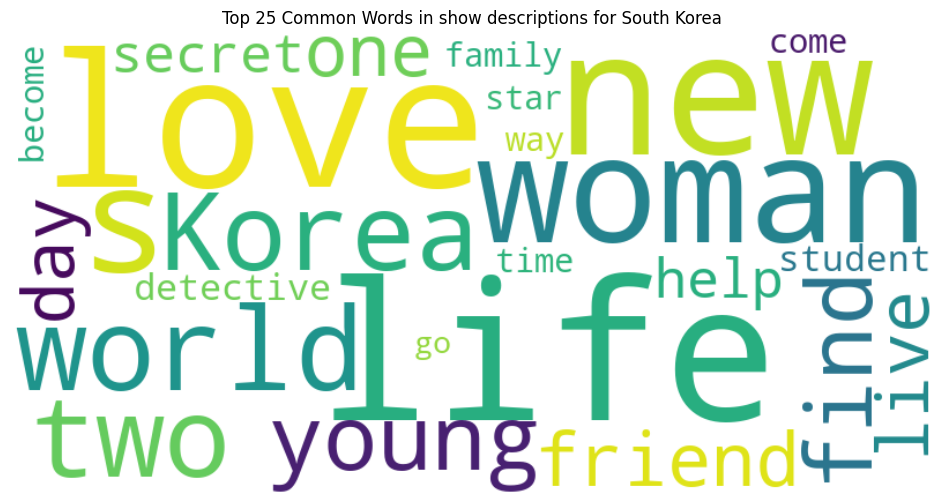

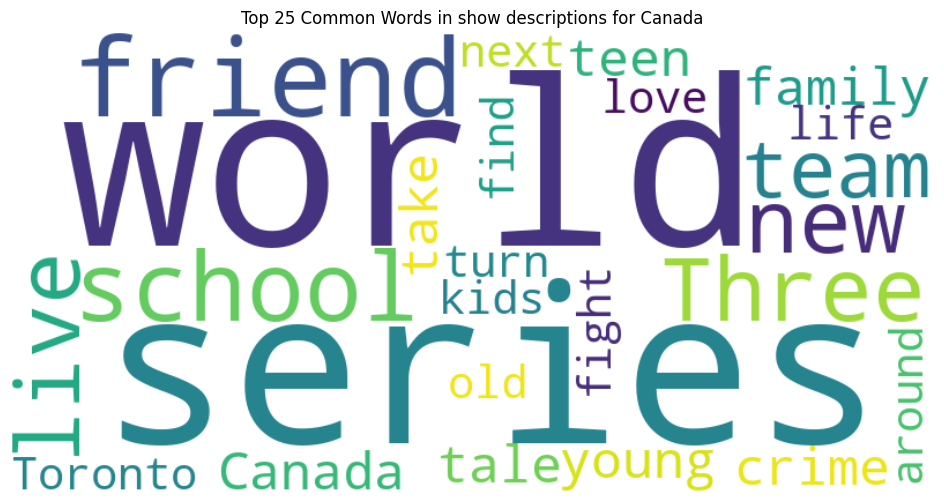

In [153]:
from wordcloud import WordCloud, STOPWORDS
df_filtered = netflix_shows[netflix_shows['country'].isin(top_five_countries_shows)]
for country in top_five_countries_shows:
    country_descriptions = df_filtered[df_filtered['country'] == country]['description']
    all_descriptions = ' '.join(country_descriptions)
    # Remove stop words from the descriptions
    stopwords = set(STOPWORDS)
    stopwords.update(["movie", "film", "story", "show"])  # Add custom stop words if needed
    # Create a WordCloud object with cleaned descriptions
    wordcloud = WordCloud(width=800, height=400, max_words=25, background_color='white', stopwords=stopwords).generate(all_descriptions)
    
    # Display the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top 25 Common Words in show descriptions for {country}")
    plt.show()


    